In [ ]:
pip install imblearn

In [1]:
#data manipulation and visualisation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#import interactive library
from ipywidgets import interact

#balancing the target variable
from imblearn.over_sampling import RandomOverSampler

#variable scaling libraries
from sklearn.preprocessing import StandardScaler

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#feature selection libraries
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#import hyperparameter tuning library
from sklearn.model_selection import GridSearchCV

#other libraries
import math
from collections import Counter

In [2]:
# import warnings

# # Suppress all FutureWarnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('waterQuality1.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
data.shape

(7999, 21)

In [5]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
missing_value = ['#NUM!', np.nan]
data =pd.read_csv('waterQuality1.csv', na_values = missing_value)
data.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [8]:
data.dropna( subset=['ammonia', 'is_safe'], axis=0, inplace=True)
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [9]:
data.shape

(7996, 21)

In [10]:
#convert both columns to numeric data type
data['ammonia'] = pd.to_numeric(data['ammonia'])
data['is_safe'] = pd.to_numeric(data['is_safe'])

In [13]:
#statistic metrics for continuous variables without scientific notation
data.describe(include='all').apply(lambda s: s.apply(lambda x: format(x, 'f')))

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [14]:
print(data['viruses'].unique())

[0.    0.65  0.003 0.71  0.001 0.67  0.007 0.005 0.002 0.83  0.008 0.52
 0.91  0.7   0.009 0.89  0.85  0.75  0.99  0.92  0.58  0.8   0.56  0.96
 0.69  0.006 0.77  0.004 0.63  0.86  0.79  0.84  0.98  0.74  0.76  0.51
 0.72  0.53  0.64  0.57  0.82  0.87  0.55  1.    0.78  0.61  0.62  0.5
 0.59  0.68  0.73  0.93  0.66  0.6   0.97  0.95  0.9   0.94  0.54  0.81
 0.88 ]


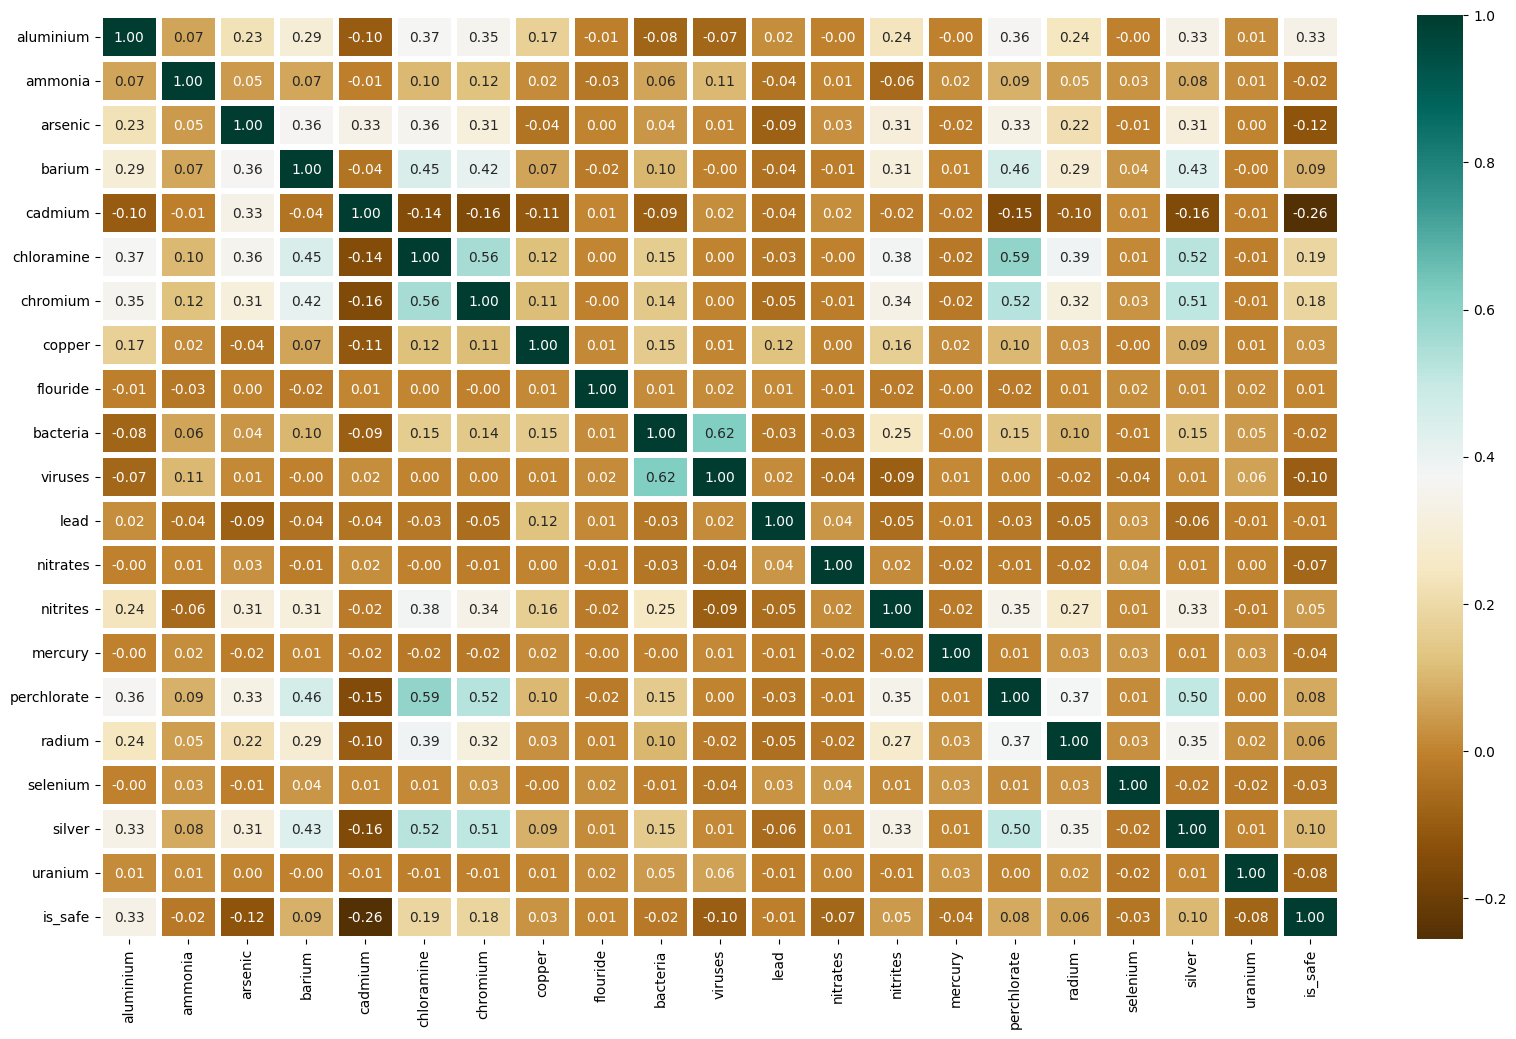

In [15]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [17]:
palette_features = ['#E68753', '#409996']

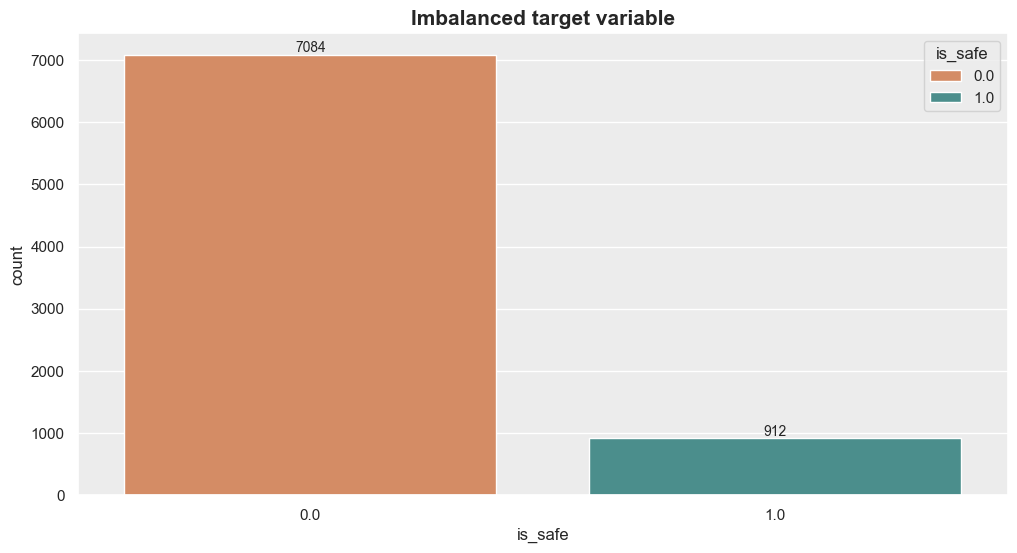

In [18]:
#plot target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Arial', ha='center')
ax = sns.countplot(x='is_safe', data=data,hue='is_safe', palette=palette_features)

#add labels to each bar
abs_values = data['is_safe'].value_counts(ascending=False).values
for i, v in enumerate(abs_values):
    if v is not None:
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

#show the plot
plt.show()

In [19]:
#balance the target variable
columns = data.columns
columns = [c for c in columns if c not in ['is_safe']]
y = data['is_safe'] #prior target variable
X = data[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y)}\n")
print(X.shape[0] - data.shape[0], 'new random picked points')

Imbalanced target class: 0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
14163    1.0
14164    1.0
14165    1.0
14166    1.0
14167    1.0
Name: is_safe, Length: 14168, dtype: float64

Balanced target class: Counter({1.0: 7084, 0.0: 7084})

6172 new random picked points


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

C:\Users\darre\AppData\Local\Temp\ipykernel_7860\2583496774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, data=data, palette=palette_features)


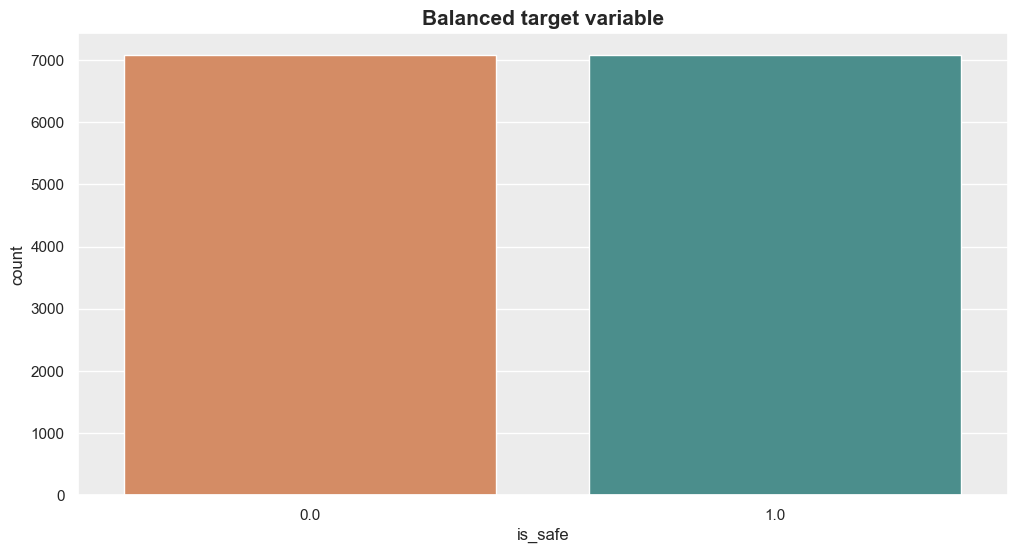

In [20]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Arial', ha='center')
ax = sns.countplot(x=y, data=data, palette=palette_features)
plt.show()

In [21]:
#preparation of train and test data for K-NN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #70 % of train data, 30 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9917, 20), (4251, 20), (9917,), (4251,))

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

[[1516  555]
 [  69 2111]]


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

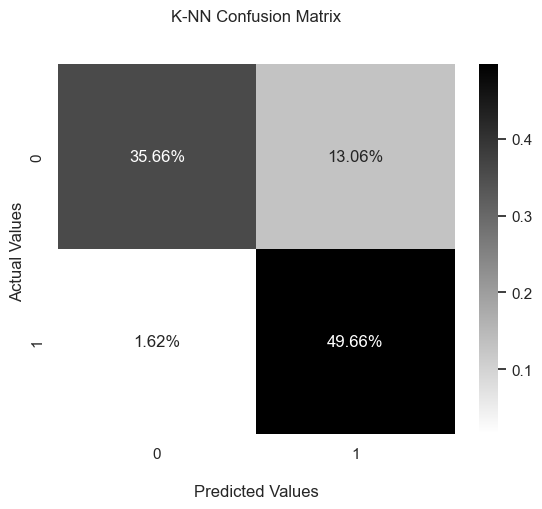

In [22]:
#implement K-NN algorithm
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_test)

#plotting Confusion Matrix
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
#evaluation of K-NN: metrics pivot chart
print(classification_report(y_test, y_pred_knnc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knnc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knnc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knnc),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knnc),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_knnc),3)))

              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      2071
         1.0       0.79      0.97      0.87      2180

    accuracy                           0.85      4251
   macro avg       0.87      0.85      0.85      4251
weighted avg       0.87      0.85      0.85      4251

Accuracy Score : 0.853
Precision Score : 0.792
Recall Score : 0.968
F-Score : 0.871
AUC Score : 0.85


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

# rescale, reduction of data

In [24]:
#preparation of train and test data for ML models
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3, random_state = 1) #70 % of train data, 30 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9917, 20), (4251, 20), (9917,), (4251,))

In [25]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std).head())

After standardizing our features, the first 5 rows of our data now look like this:

         0         1         2         3         4         5         6   \
0 -0.749750 -1.277076 -0.517833 -1.241720 -0.877032  0.498234  0.894492   
1 -0.578564 -0.478006 -0.517833  1.572846 -0.820640  0.356491  1.106827   
2  2.002389 -0.837815 -0.427715  0.922697 -0.792444 -0.172172 -0.202571   
3 -0.394211 -0.538163 -0.427715 -1.003058 -0.736052 -0.781285  1.673054   
4  0.725080  1.467457 -0.517833  1.753900 -0.736052  0.938787  1.708443   

         7         8         9         10        11        12        13  \
0 -0.133177  1.111390  1.709781  1.584974 -0.030544 -1.585296 -0.132669   
1  0.489223  1.644457 -0.956130 -0.777814 -0.204607  1.161560  1.056622   
2  1.064943 -0.580519 -0.956130 -0.777814  1.553433 -0.759094  0.423612   
3 -0.397697  1.250451 -0.956130 -0.777814  0.334989 -0.016942  0.135880   
4  1.765143  1.621280 -0.956130 -0.777814 -1.179362  0.040284  0.135880   

         14   

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

In [26]:
select_feature = SelectKBest(f_classif, k=10).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [2.24245241e+03 1.28537441e+01 5.02804217e+02 1.98677799e+02
 2.06868058e+03 9.95837303e+02 7.74518124e+02 1.75567673e+01
 7.67066796e-01 1.16007099e+01 2.45398903e+02 7.31146201e+00
 1.24418717e+02 4.86591698e+01 3.53894689e+01 1.41848018e+02
 1.20378653e+02 2.58037442e+01 2.37610072e+02 1.36300884e+02]
Feature list: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

[[1565  506]
 [  50 2130]]


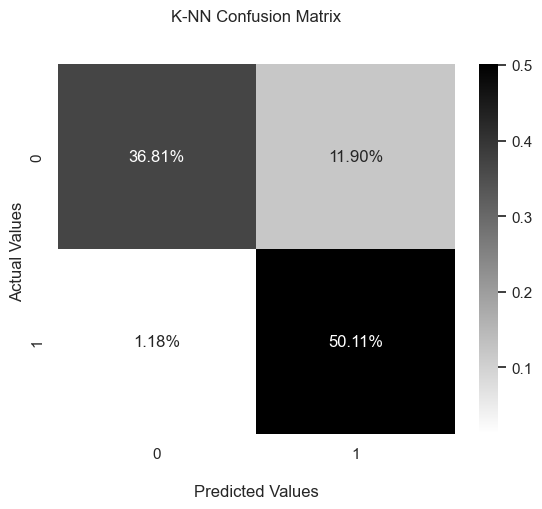

In [29]:
X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)

knnc = KNeighborsClassifier()   
knnc = knnc.fit(X_train_2,y_train)

y_pred_knnc = knnc.predict(X_test_2)

cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
#evaluation of K-NN: metrics pivot chart
print(classification_report(y_test, y_pred_knnc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knnc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knnc,pos_label=0),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knnc,pos_label=0),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knnc,pos_label=0),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_knnc),3)))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      2071
         1.0       0.81      0.98      0.88      2180

    accuracy                           0.87      4251
   macro avg       0.89      0.87      0.87      4251
weighted avg       0.89      0.87      0.87      4251

Accuracy Score : 0.869
Precision Score : 0.969
Recall Score : 0.756
F-Score : 0.849
AUC Score : 0.866


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

# hyperparameter tuning

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Best Score:0.9309269415027737
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}
[[1847  224]
 [  14 2166]]


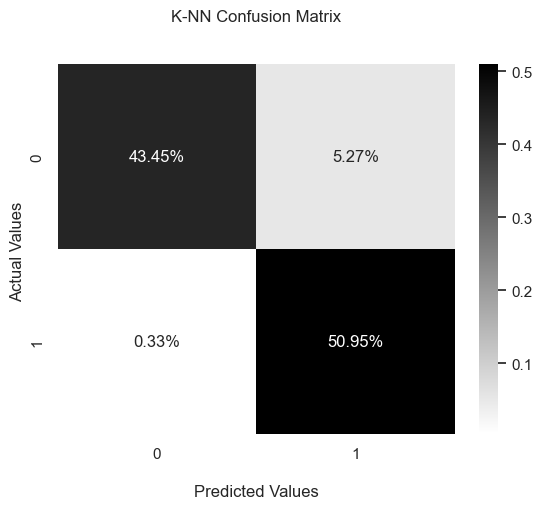

In [33]:
#hyperparameter tuning
param_grid = {'n_neighbors':np.arange(1,40), 'metric':['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_2,y_train)

y_pred_knn_cv = knn_cv.predict(X_test_2)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

cf_matrix_knn_cv = confusion_matrix(y_test, y_pred_knn_cv)
print(cf_matrix_knn_cv)

ax = sns.heatmap(cf_matrix_knn_cv/np.sum(cf_matrix_knn_cv), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
#evaluation of K-NN: metrics pivot chart
print(classification_report(y_test, y_pred_knn_cv))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knn_cv),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knn_cv,pos_label=0),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knn_cv,pos_label=0),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knn_cv,pos_label=0),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_knn_cv),3)))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      2071
         1.0       0.91      0.99      0.95      2180

    accuracy                           0.94      4251
   macro avg       0.95      0.94      0.94      4251
weighted avg       0.95      0.94      0.94      4251

Accuracy Score : 0.944
Precision Score : 0.992
Recall Score : 0.892
F-Score : 0.939
AUC Score : 0.943


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut